##1. Description
The provided code implements the gradient descent algorithm for multiply input/feature. I am utilizing the ['multiple-linear-regression-dataset'](https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset) dataset obtained from Kaggle. This dataset has three columns and twenty rows. There are two independent variables (feature) and one dependent variable (target). The independent variables are 'age' and 'experience'. The dependent variable is 'income'.



## 2. Import dataset from Kaggle


In [45]:
!chmod 600 /content/kaggle.json

In [25]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d hussainnasirkhan/multiple-linear-regression-dataset

multiple-linear-regression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
import zipfile
zip_file = zipfile.ZipFile('/content/multiple-linear-regression-dataset.zip', 'r')
zip_file.extractall()

In [27]:
import pandas as pd
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## 3. Data Training

In [46]:
from prettytable import PrettyTable

path = "multiple_linear_regression_dataset.csv"
adv = pd.read_csv(path)

print(adv)

    age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700


In [47]:
x_train  = adv[['age', 'experience']].values

print(f"X shape: {x_train.shape})")
print(x_train)

X shape: (20, 2))
[[25  1]
 [30  3]
 [47  2]
 [32  5]
 [43 10]
 [51  7]
 [28  5]
 [33  4]
 [37  5]
 [39  8]
 [29  1]
 [47  9]
 [54  5]
 [51  4]
 [44 12]
 [41  6]
 [58 17]
 [23  1]
 [44  9]
 [37 10]]


In [49]:
income_array = pd.read_csv(path, usecols=['income']).values
y_train = income_array.flatten()

print(f"Y shape: {y_train.shape})")
print(y_train)

Y shape: (20,))
[30450 35670 31580 40130 47830 41630 41340 37650 40250 45150 27840 46110
 36720 34800 51300 38900 63600 30870 44190 48700]


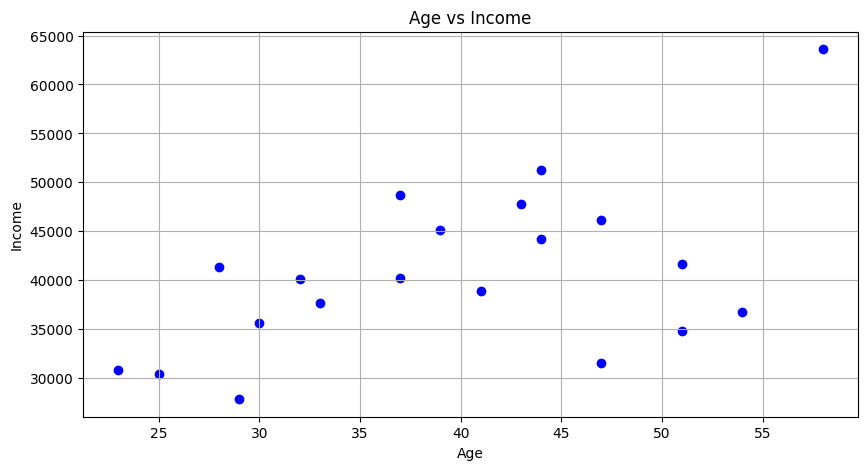

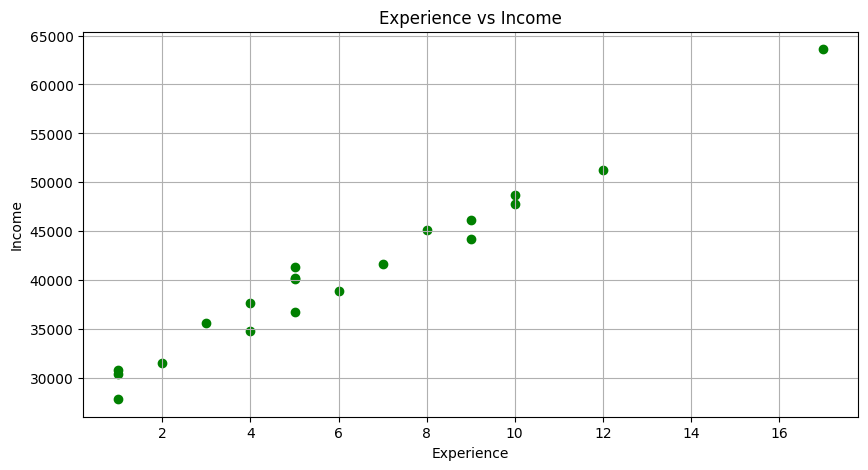

In [50]:
# Scatter plot for age vs income
plt.figure(figsize=(10, 5))
plt.scatter(adv['age'], adv['income'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.grid(True)
plt.show()

# Scatter plot for experience vs income
plt.figure(figsize=(10, 5))
plt.scatter(adv['experience'], adv['income'], color='green')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Experience vs Income')
plt.grid(True)
plt.show()


## 4. compute_cost
This function is used to calculate the cost function in the context of linear regression. The cost function measures the **overall** error between the predicted values and the actual values of the target variable.



*  m = total data train
*  f_wb_i = function/model




In [32]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

## 5. compute_gradient
This function calculates the gradients of the cost function with respect to the parameters w and b in the context of linear regression. The function calculates the gradients using the partial derivatives of the cost function.The function returns these average gradients, which will be used in the gradient descent algorithm to update the model parameters w and b iteratively to minimize the cost function.

*   n = total input/feature
*   dj_dw = the gradient of the cost with respect to the parameters w.
*   dj_db = the gradient of the cost with respect to the parameters b.


   








In [33]:
def compute_gradient(x, y, w, b):

    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

## 6. gradient_descent
This function implements the gradient descent algorithm to minimize a cost function during training model.



*   x = data (multiple features)
*   y = target values
*   J_history = An array to store cost J
*   w = weights (parameter)
*   b = bias (parameter)
*   alpha = learning rate
*   num_iters = number of iterations to run gradient descent









In [51]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<num_iters:
            J_history.append( cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

In [52]:
initial_w = np.array([0,0])
initial_b = 0

iterations = 1000
alpha = 3.0e-6

w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 855051388.42   
Iteration  100: Cost 328823714.08   
Iteration  200: Cost 140952420.87   
Iteration  300: Cost 73852853.51   
Iteration  400: Cost 49861284.43   
Iteration  500: Cost 41256756.90   
Iteration  600: Cost 38144670.86   
Iteration  700: Cost 36993288.93   
Iteration  800: Cost 36542006.40   
Iteration  900: Cost 36340866.89   
b,w found by gradient descent: 26.79,[956.78244426 200.08608752] 
prediction: 24146.44, target value: 30450
prediction: 29330.52, target value: 35670
prediction: 45395.74, target value: 31580
prediction: 31644.26, target value: 40130
prediction: 43169.30, target value: 47830
prediction: 50223.30, target value: 41630
prediction: 27817.13, target value: 41340
prediction: 32400.96, target value: 37650
prediction: 36428.17, target value: 40250
prediction: 38942.00, target value: 45150
prediction: 27973.57, target value: 27840
prediction: 46796.34, target value: 46110
prediction: 52693.47, target value: 36720
prediction: 49623.04, tar

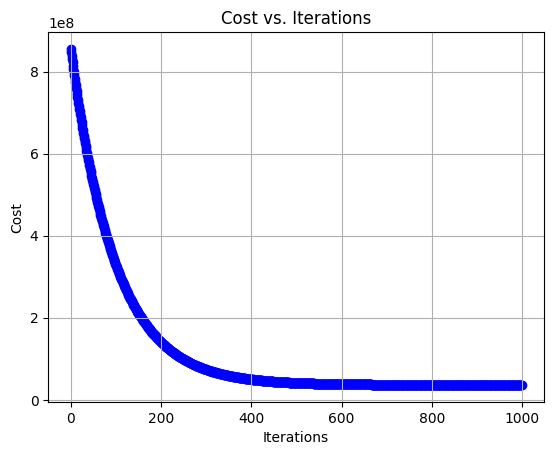

In [54]:
import matplotlib.pyplot as plt

iterations = list(range(len(J_hist)))  # Number of iterations
cost_values = J_hist  # Corresponding cost values

# Create the scatter plot
plt.scatter(iterations, cost_values, color='blue', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.grid(True)
plt.show()


## 7. Prediction
After obtaining the optimal values for the parameters w and b, we can now utilize the model to predict housing values based on our learned parameters.

In [55]:
print(f"Prediction for age 31 and 11 experience: {np.dot([31,11], w_final) + b_final:0.2f}")
print(f"Prediction for age 26 and 21 experience: {np.dot([26,21], w_final) + b_final:0.2f}")

Prediction for age 31 and 11 experience: 31887.99
Prediction for age 26 and 21 experience: 29104.94
